In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get random number between -0.5 and 0.5
print(np.random.rand() - 0.5)

0.4428472563455079


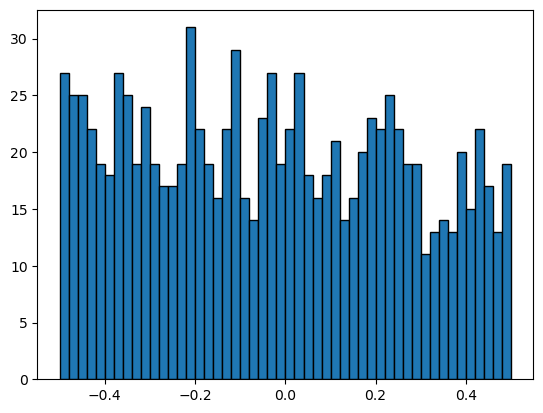

In [4]:
random_offsets = []
for i in range(1000):
    random_offsets.append(np.random.rand() - 0.5)

plt.hist(random_offsets, bins = 50, edgecolor = "black")
plt.show()

In [5]:
def v_fitting(y_1, y_2, y_3):
    # Fit using a symmetric 'V' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    if y_1 < y_2 or y_3 < y_2:
        return 0, 0

    if y_1 > y_3:
        x = 0.5 * (y_1 - y_3) / (y_1 - y_2)
        y = y_2 - x * (y_1 - y_2)
    else:
        x = 0.5 * (y_1 - y_3) / (y_3 - y_2)
        y = y_2 + x * (y_3 - y_2)


    return x, y

In [6]:
def parabola(x, a, b, c, subframe):
    return a * (x-subframe)**2 + b * (x-subframe) + c


def supergaussian(x, a, b, c, d, subframe):
    return a * np.exp(-b * (x-subframe)**c) + d

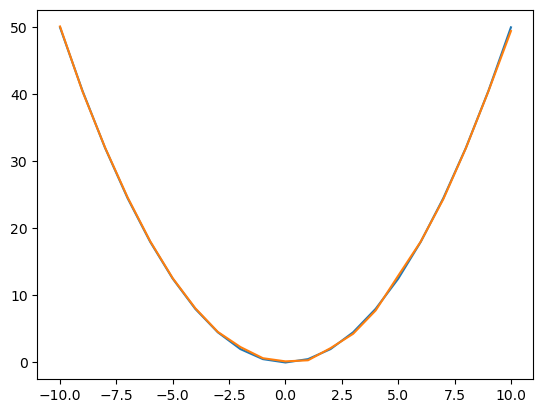

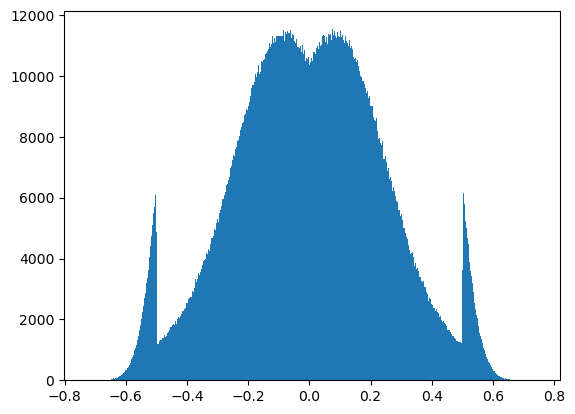

In [7]:
points = 10

xs = np.linspace(-points, points, points * 2 + 1)
ys_ = parabola(xs, 0.5, 0, 0, 0)

plt.plot(xs, ys_)

offsets = []
for i in range(5000000):

    ys = ys_ + np.random.normal(0, 0.2, points * 2 + 1)

    if i == 0:
        plt.plot(xs, ys)
        plt.show()

    minima = np.argmin(ys)

    x, y = v_fitting(ys[minima-1], ys[minima], ys[minima+1])

    offsets.append(minima + x - points)

plt.hist(offsets, bins = 1000)
plt.show()

In [8]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks
from scipy import signal

import tifffile as tf

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


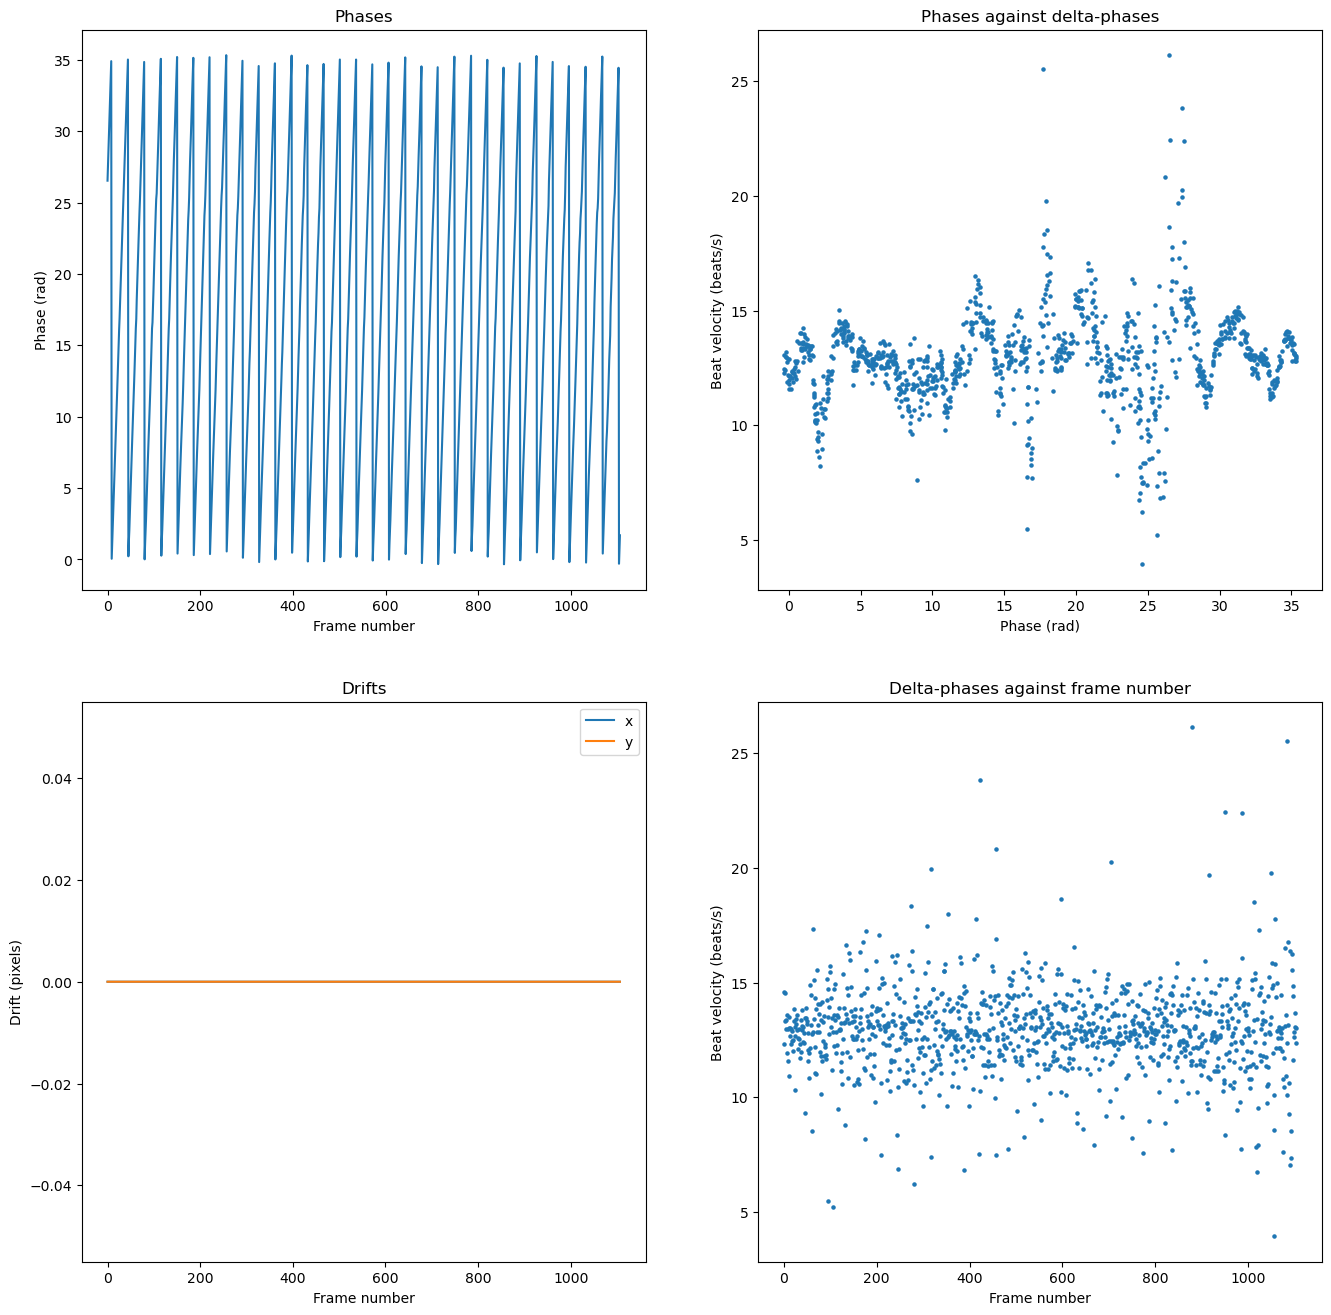

In [9]:
oog = OG.BasicOpticalGating().default()
oog.settings["pi_space"] = False
oog.settings["include_reference_frames"] = False
oog.run()

oog.plot_summary()

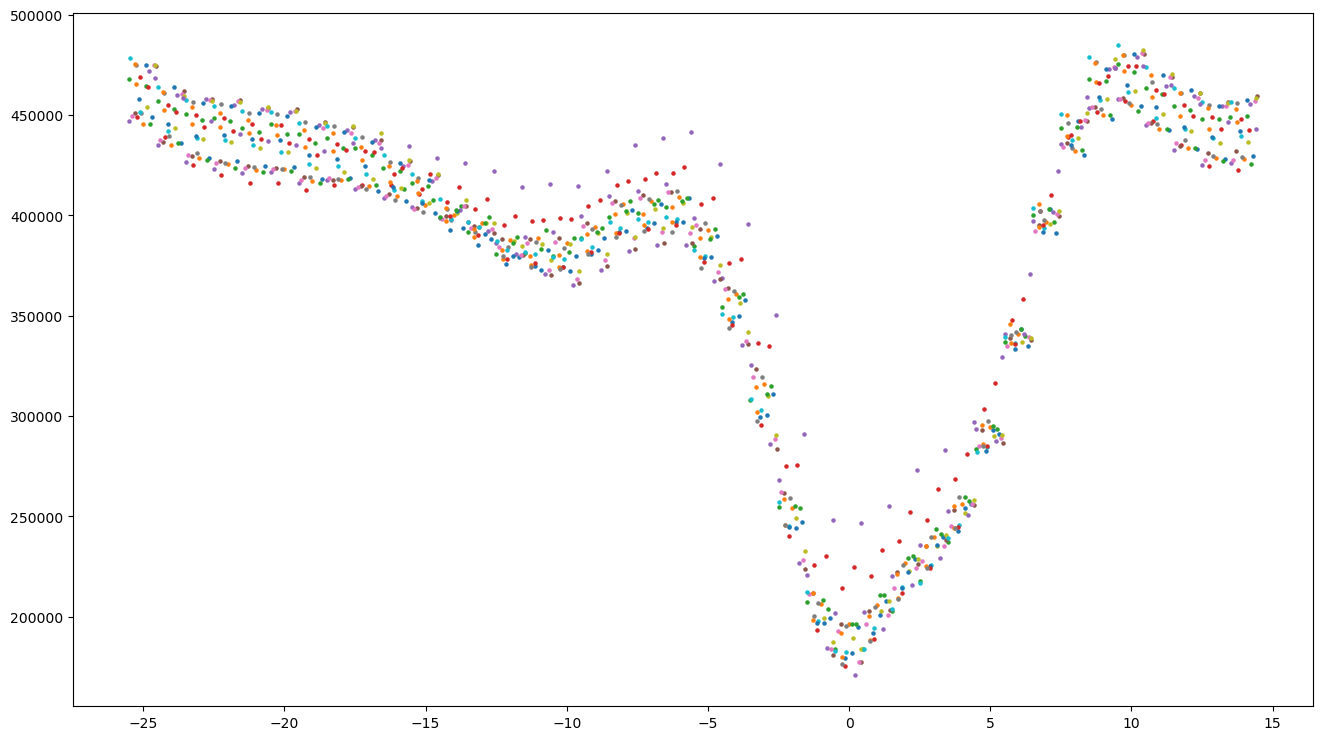

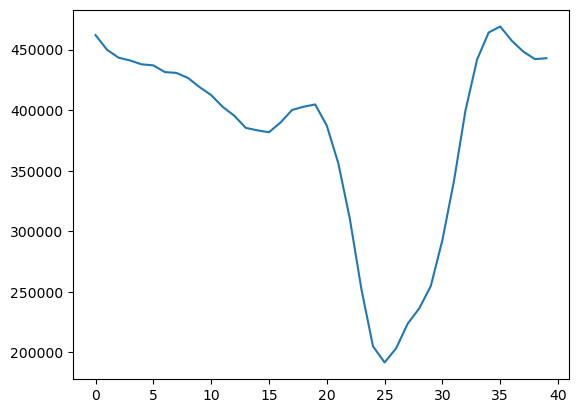

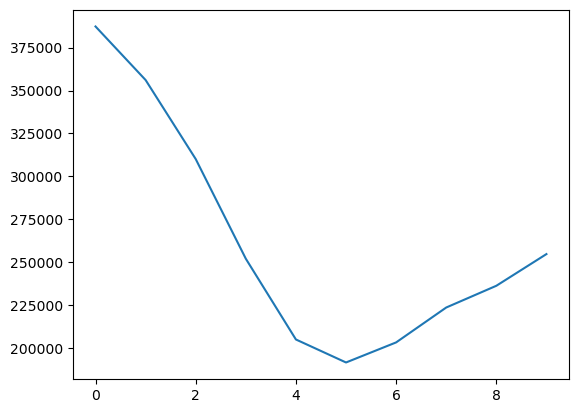

In [10]:
locs = np.where(oog.frame_minimas == 25)[0][2::]
sads = np.array(oog.sads)

plt.figure(figsize = (16,9))
for loc in locs:
    plt.scatter(np.arange(len(sads[loc])) - 2 - oog.phases[loc], sads[loc], s = 5)

plt.show()

plt.plot(np.mean(np.array(oog.sads)[locs], axis = 0))
plt.show()

plt.plot(np.mean(np.array(oog.sads)[locs], axis = 0)[20:30])


(array([   0,    1,    2, ..., 1102, 1103, 1104], dtype=int64),)


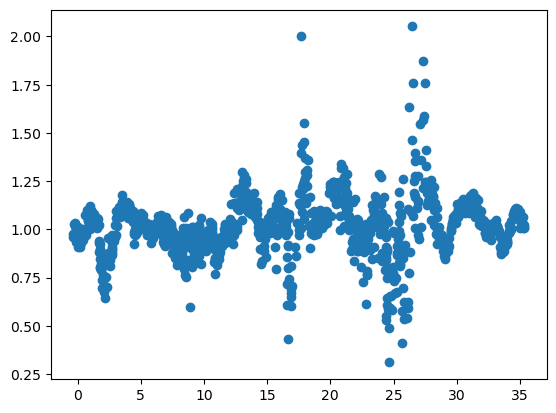

In [11]:
plt.scatter(oog.phases[1::], oog.delta_phases)
print(np.where(oog.delta_phases > 0.35))

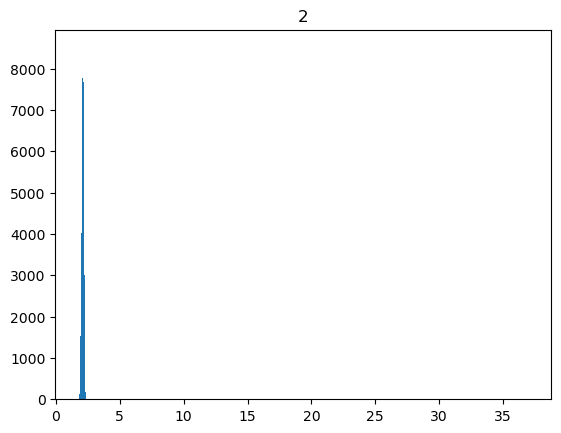

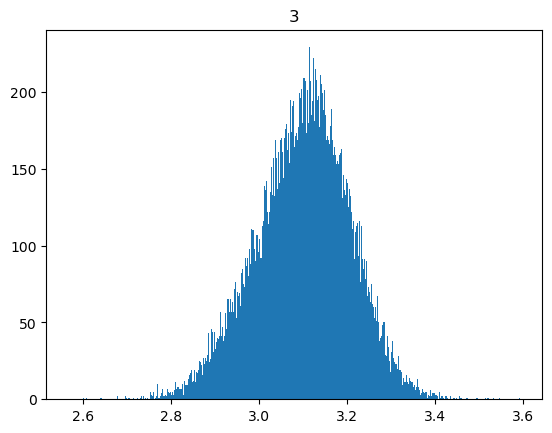

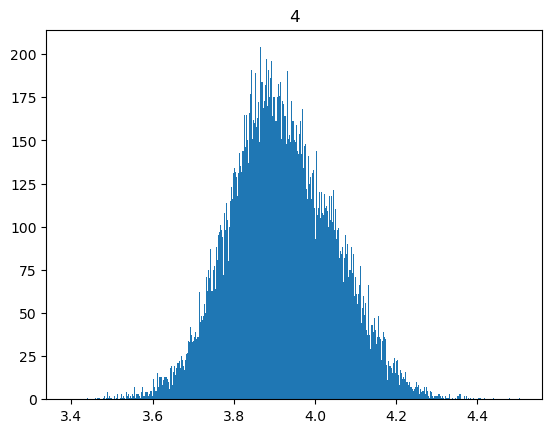

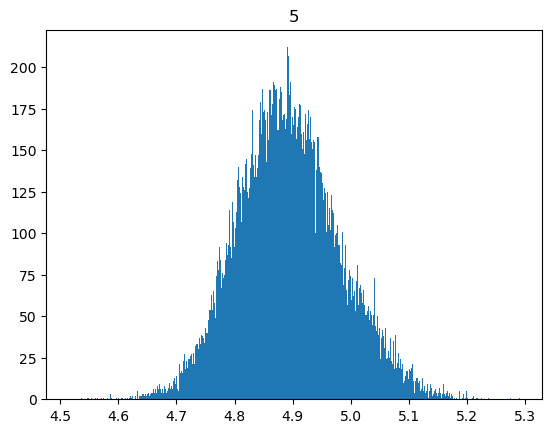

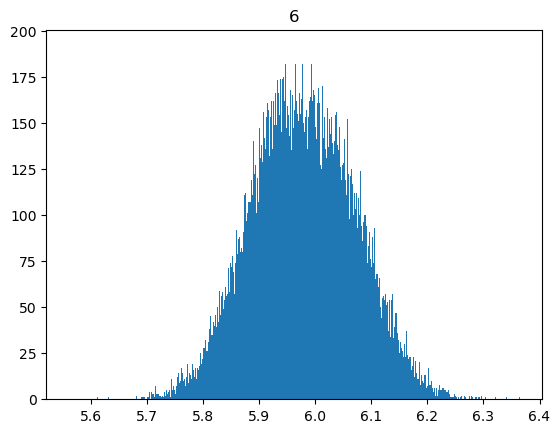

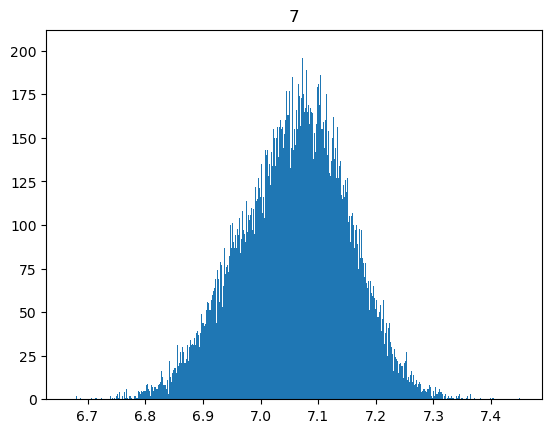

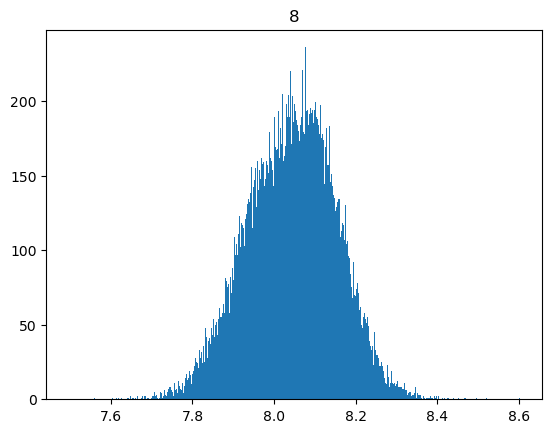

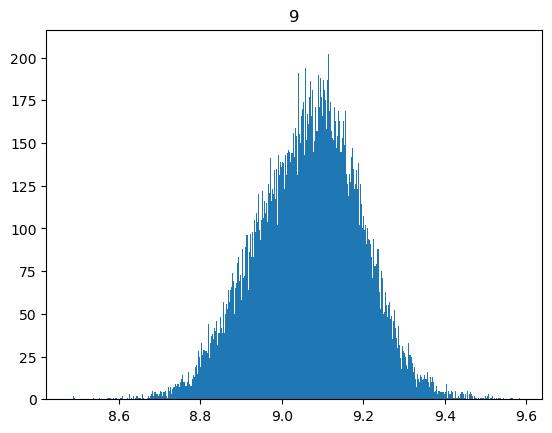

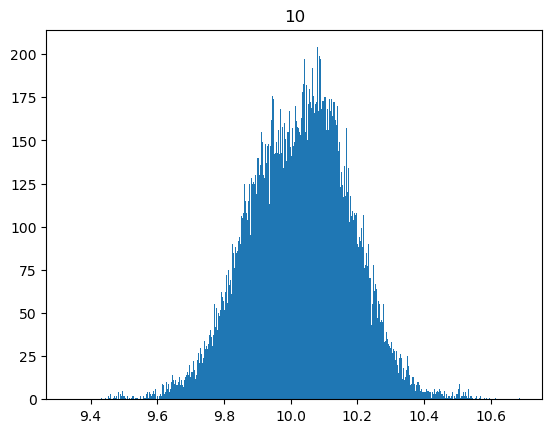

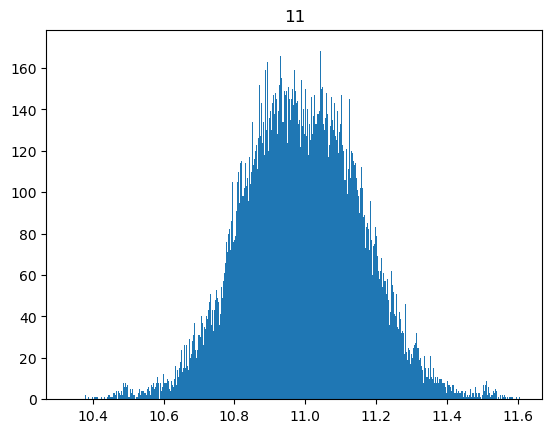

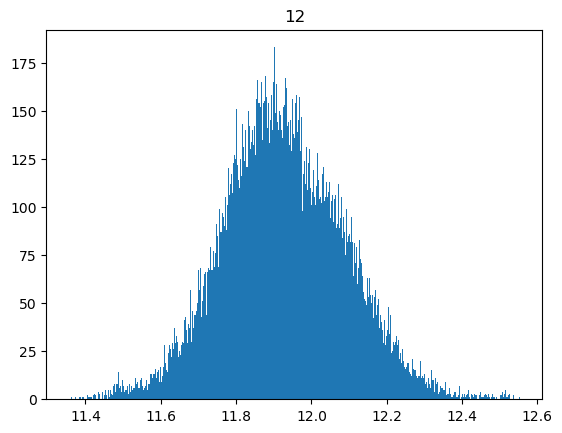

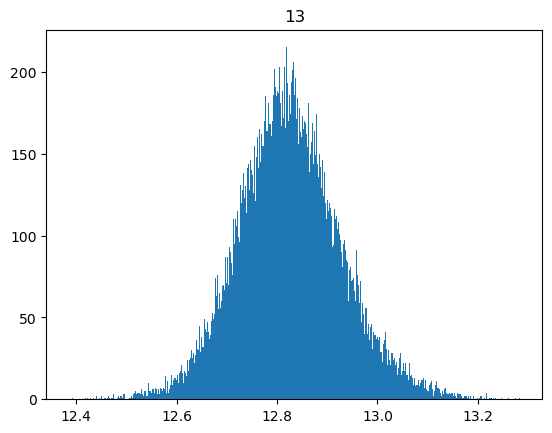

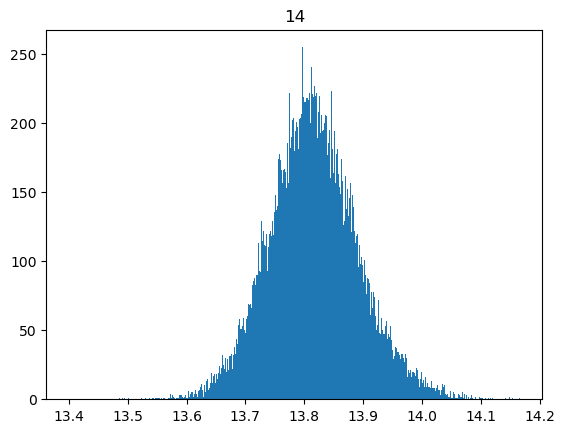

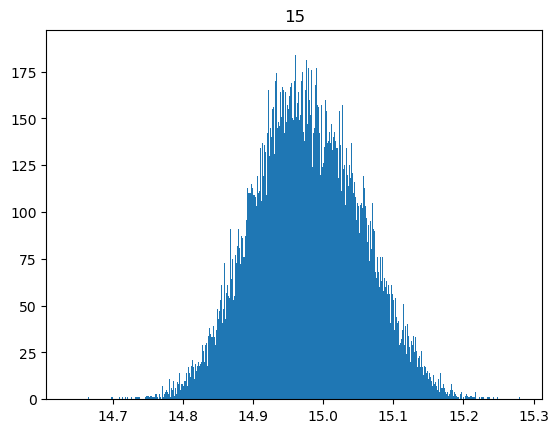

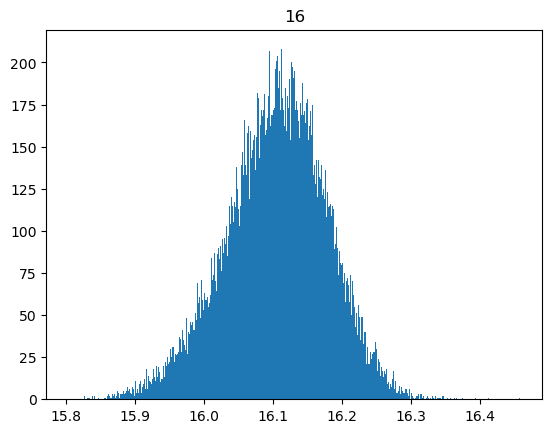

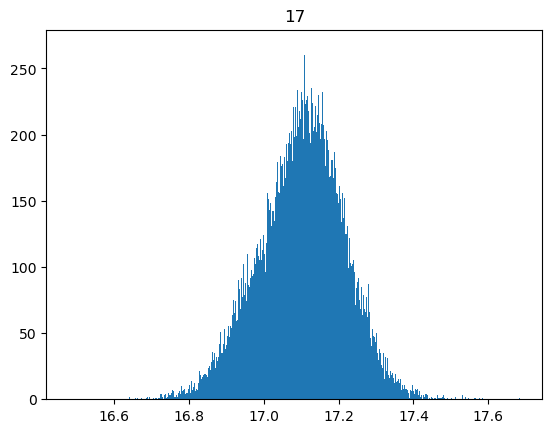

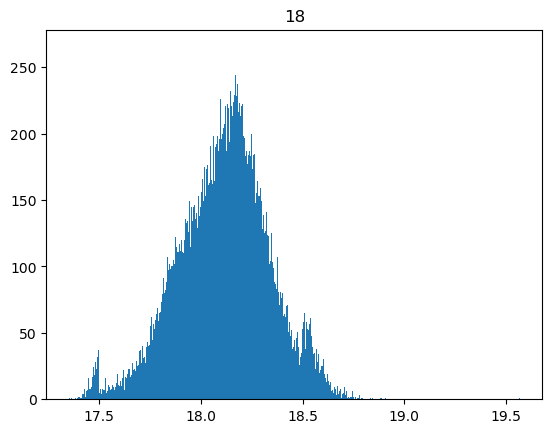

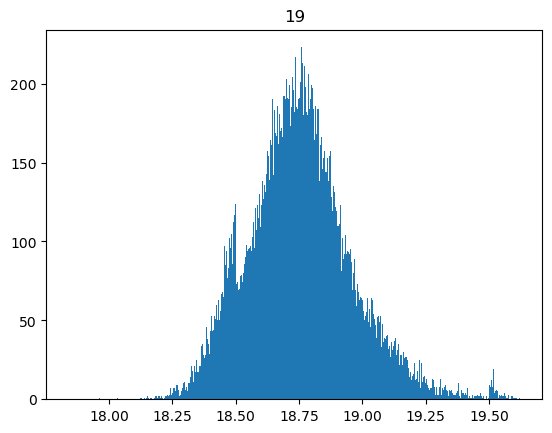

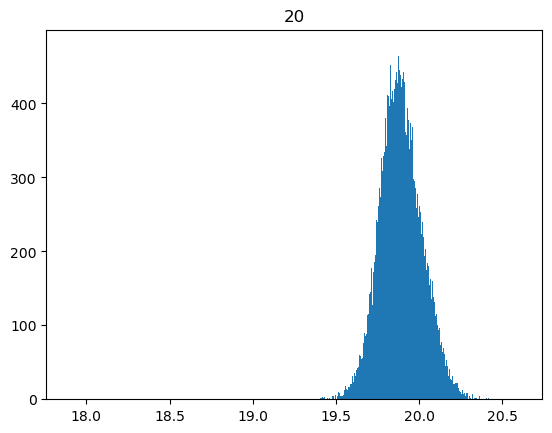

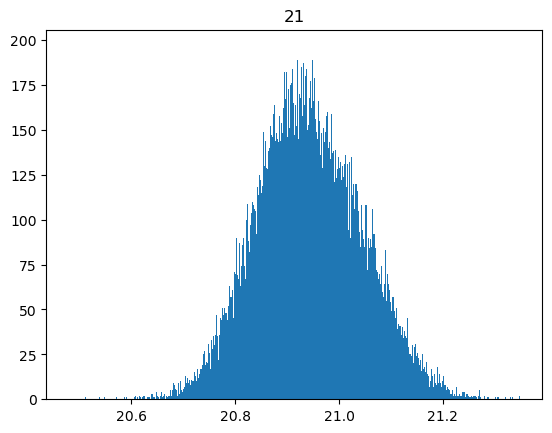

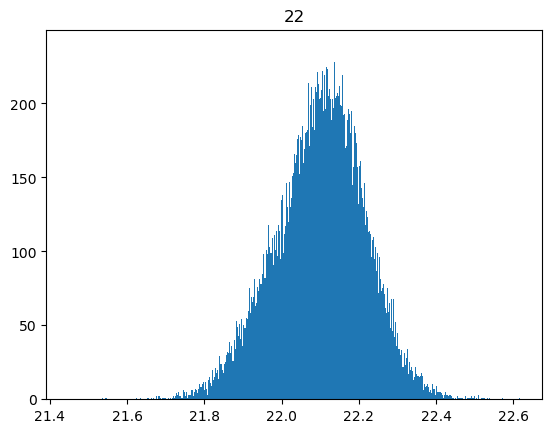

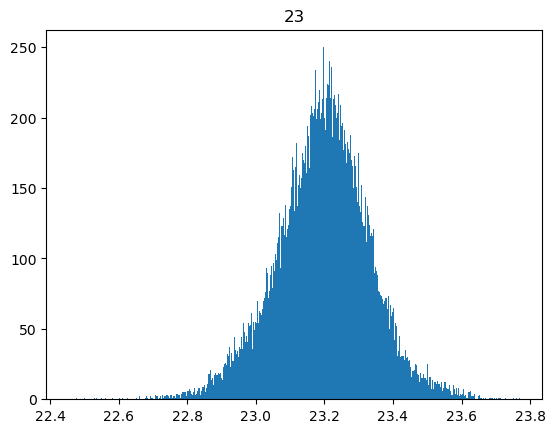

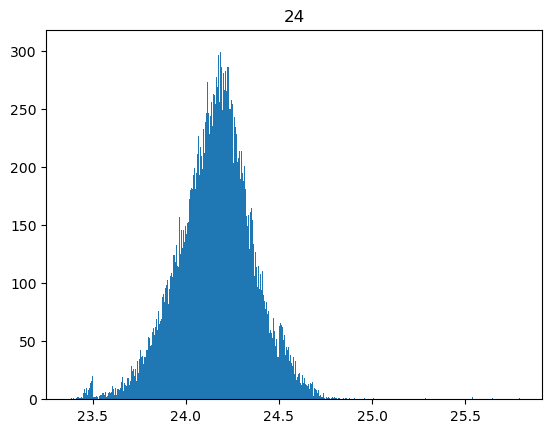

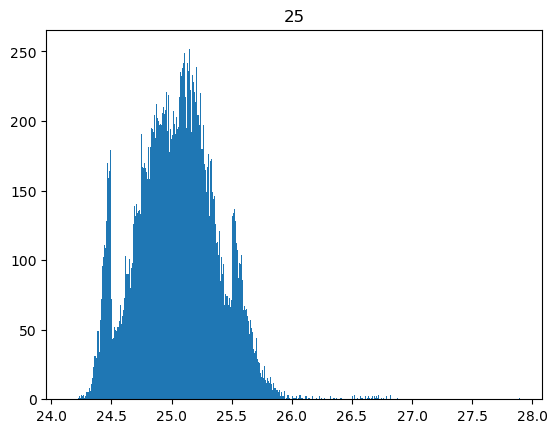

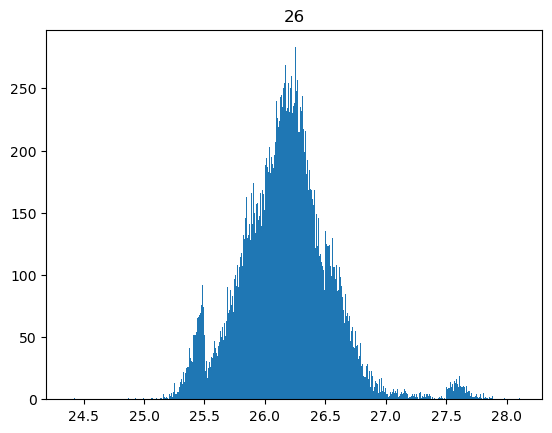

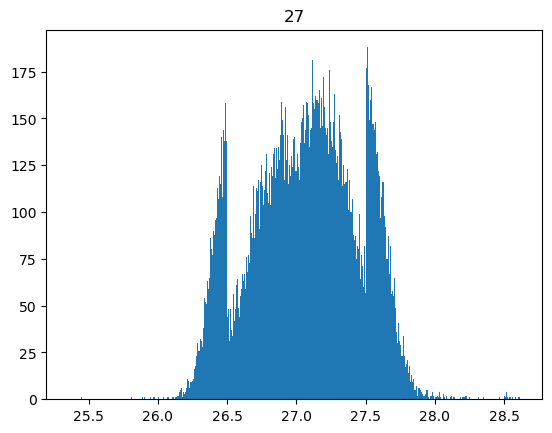

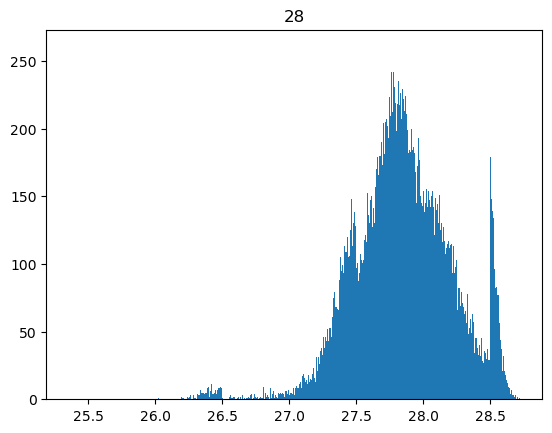

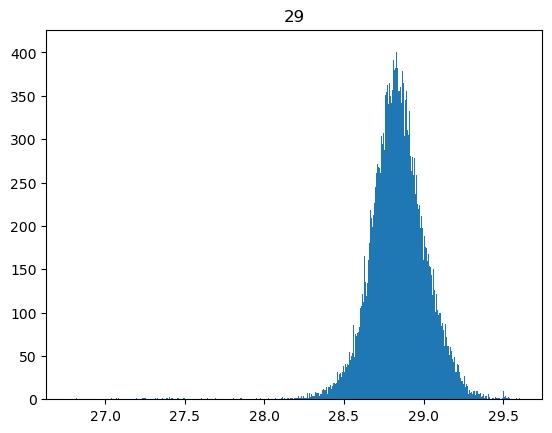

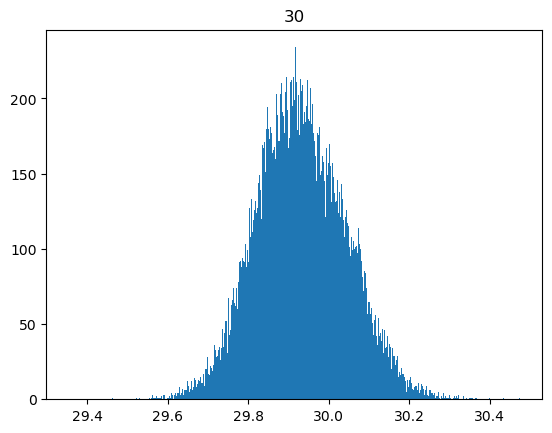

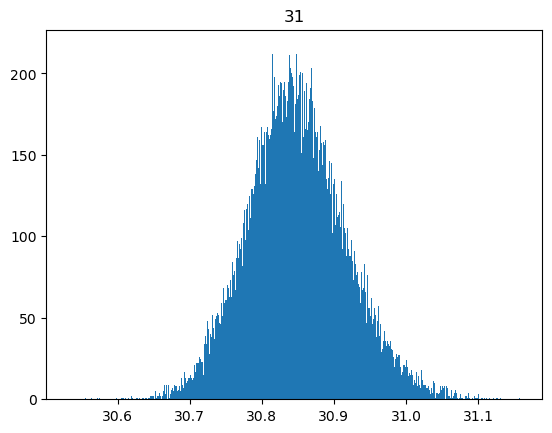

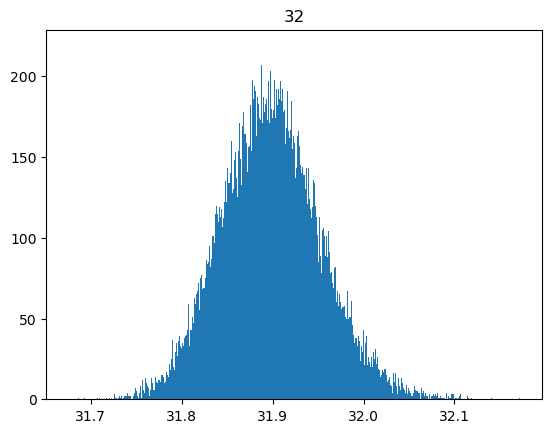

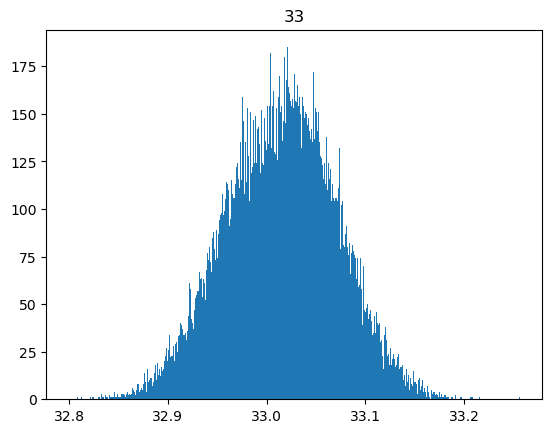

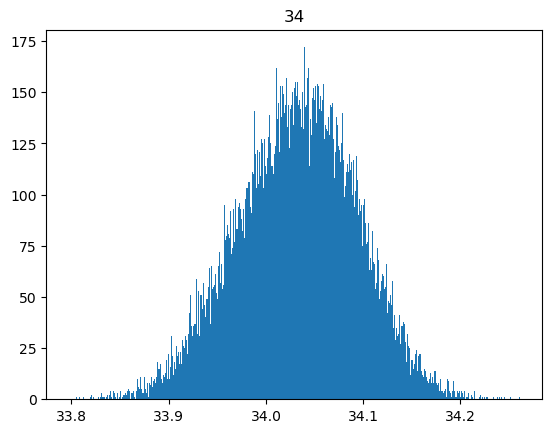

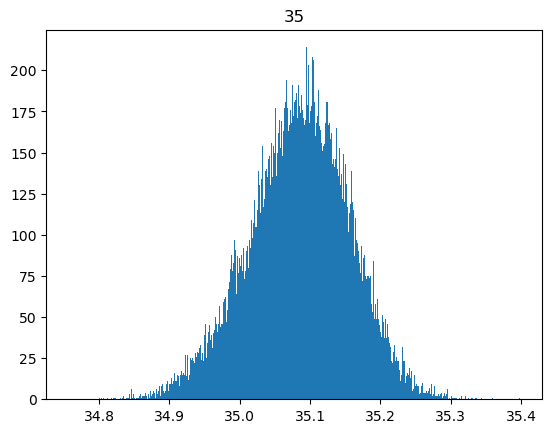

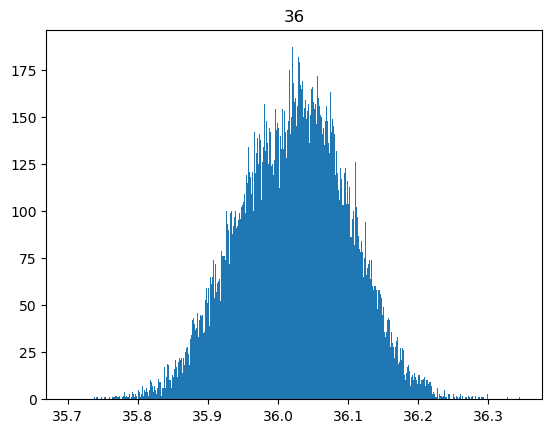

In [12]:
for minima_location in range(2, len(oog.sequence_manager.reference_sequence) - 3):
    offsets = []
    sad = np.mean(np.array(oog.sads)[np.where(oog.frame_minimas == minima_location)], axis = 0)

    for i in range(50000):

        ys = sad + np.random.normal(0, 10000, len(sad))

        minima = np.argmin(ys[2:-2]) + 2

        x, y = v_fitting(ys[minima-1], ys[minima], ys[minima+1])

        offsets.append(minima + x)

    plt.title(minima_location)
    plt.hist(offsets, bins = 1000)
    plt.show()